In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
n = 201    # x点数
X = np.linspace(-1, 1, n)[:,np.newaxis]    # 等差数列构建X，[:,np.newaxis]这个是shape，这一行构建了一个n维列向量（[1,n]的矩阵）
noise = np.random.normal(0, 0.5, X.shape)    # 噪声值，与X同型
Y = X*2.7 + 0.6 + noise    # Y
 
xs = tf.placeholder(tf.float32, [None, 1])    # 下面两行是占位符tf.placeholder(dtype, shape)
ys = tf.placeholder(tf.float32, [None, 1])
 
w = tf.Variable(1.1)    # 这两行是weight变量，bias变量，括号中是初始值
b = tf.Variable(0.2)
 
ypredict = tf.add(w*xs,b)    # 根据 w, b 产生的预测值
 
loss = tf.reduce_sum(tf.pow(ys-ypredict,2.0))/n    # 损失函数，tf.reduce_sum()按某一维度元素求和，默认为按列
 
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)    # 梯度下降优化器，0.01学习率，最小化losss
 
init = tf.global_variables_initializer()    # 初始化所有变量

w: 1.1105278 	 b: 0.20765084 	 loss: 1.1967809
w: 1.5557199 	 b: 0.44601795 	 loss: 0.676071
w: 1.8732903 	 b: 0.53282416 	 loss: 0.4569736
w: 2.099824 	 b: 0.5644363 	 loss: 0.35156944
w: 2.2614183 	 b: 0.57594866 	 loss: 0.29874152
w: 2.3766897 	 b: 0.5801408 	 loss: 0.27196714
w: 2.4589171 	 b: 0.58166754 	 loss: 0.25835723
w: 2.5175726 	 b: 0.58222365 	 loss: 0.25143382
w: 2.5594134 	 b: 0.5824262 	 loss: 0.24791117
w: 2.5892599 	 b: 0.58249974 	 loss: 0.24611872
w: 2.6105506 	 b: 0.58252656 	 loss: 0.24520661
w: 2.6257372 	 b: 0.5825363 	 loss: 0.24474256
w: 2.6365705 	 b: 0.5825399 	 loss: 0.24450642
w: 2.6442978 	 b: 0.5825405 	 loss: 0.24438624
w: 2.6498106 	 b: 0.5825405 	 loss: 0.24432512
w: 2.6537435 	 b: 0.5825405 	 loss: 0.24429399
w: 2.6565485 	 b: 0.5825405 	 loss: 0.24427816
w: 2.6585488 	 b: 0.5825406 	 loss: 0.24427009
w: 2.6599767 	 b: 0.5825406 	 loss: 0.24426599
w: 2.6609948 	 b: 0.5825406 	 loss: 0.2442639
拟合直线表达式为：y= 2.6617088 x+ 0.5825406


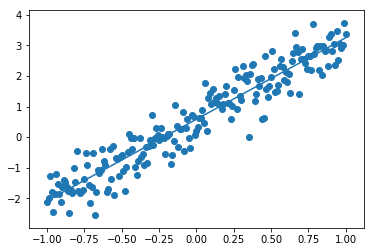

In [6]:
with tf.Session() as sess: 
    sess.run(init)    # 运行初始化 
    for i in range (1000):    # 迭代1000次 
        sess.run(optimizer, feed_dict = {xs:X,ys:Y})    # 运行优化器，梯度下降用到loss，计算loss需要xs, ys所以后面需要feed_dict 
        if i%50==0:    # 每隔50次迭代输出w,b,loss
                 # 下面sess.run(w),sess.run(b)里面没有feed_dict是因为打印w,b不需要xs,ys，而打印loss需要 
                 print ("w:",sess.run(w),"\t b:", sess.run(b), "\t loss:", sess.run(loss,feed_dict={xs:X,ys:Y})) 
        
    plt.plot(X,X*sess.run(w)+sess.run(b))    # 运行迭代之后绘制拟合曲线，这需要在sess里面运行是因为要用到w,b 
    print('拟合直线表达式为：y=',sess.run(w),'x+',sess.run(b))
    plt.scatter(X,Y)    # 绘制被拟合数据（散点） 
    plt.show()    # 绘制图像